In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
#Load the previously isolated data with YYYYMMDD format for date column
df = pd.read_csv('Davis.csv', parse_dates=['date'])

In [29]:
#Examine the first few rows of the data
df.head()

,Unnamed: 0,hospital,date,year,monthday,month,day,attendences,min,max,...,Nov,Dec,Year_1,Year_2,Year_3,Year_4,Year_5,Year_6,Year_7,Year_8
0,14610,davis,2009-01-01,2009,101,1,1,180.0,4.0,6.0,...,0,0,1,0,0,0,0,0,0,0
1,14611,davis,2009-01-02,2009,102,1,2,193.0,3.0,9.0,...,0,0,1,0,0,0,0,0,0,0
2,14612,davis,2009-01-03,2009,103,1,3,171.0,1.0,11.0,...,0,0,1,0,0,0,0,0,0,0
3,14613,davis,2009-01-04,2009,104,1,4,151.0,-4.0,10.0,...,0,0,1,0,0,0,0,0,0,0
4,14614,davis,2009-01-05,2009,105,1,5,177.0,5.0,7.0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
df.describe()

,year,monthday,month,day,attendences,min,max,aver,Hosp_ID,Time_ID,...,Nov,Dec,Year_1,Year_2,Year_3,Year_4,Year_5,Year_6,Year_7,Year_8
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.0,2922.000000,...,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,2012.501027,668.022587,6.522930,15.729637,197.363792,9.488364,23.873374,16.431211,6.0,1461.500000,...,0.082136,0.084873,0.124914,0.124914,0.124914,0.125257,0.124914,0.124914,0.124914,0.125257
std,2.291829,345.134194,3.449293,8.801598,28.764388,5.324721,8.507949,6.500274,0.0,843.653069,...,0.274618,0.278741,0.330678,0.330678,0.330678,0.331066,0.330678,0.330678,0.330678,0.331066
min,2009.000000,101.000000,1.000000,1.000000,107.000000,-6.000000,4.000000,1.000000,6.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,402.000000,4.000000,8.000000,177.000000,6.000000,17.000000,11.000000,6.0,731.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.500000,702.000000,7.000000,16.000000,197.000000,10.000000,24.000000,17.000000,6.0,1461.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.750000,1001.000000,10.000000,23.000000,218.000000,14.000000,32.000000,22.000000,6.0,2191.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,1231.000000,12.000000,31.000000,283.000000,22.000000,42.000000,32.000000,6.0,2922.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


A good amount of the feature engineering has been done already. Date is broken up into date, year, monthday, month, day, and Time_ID (number of days since beginning of dataset) as well as one-hot encoded day of week, month of year, and year. 

There is also weather data (min/max/average temp and 3 day average temp).

Additional features to consider pulling in/creating:
 - [ ] Holidays
 - [ ] rolling average of visits
 - [ ] prior week visits for the day
 - [ ] prior year visits for the day
 - [ ] precipitation (with lag?)
 - [ ] air quality (with lag?)

But first, let's visualize the data a bit.

# Data Visualization

Text(0.5, 1.0, 'Davis ER visits per day from 2009-2016')

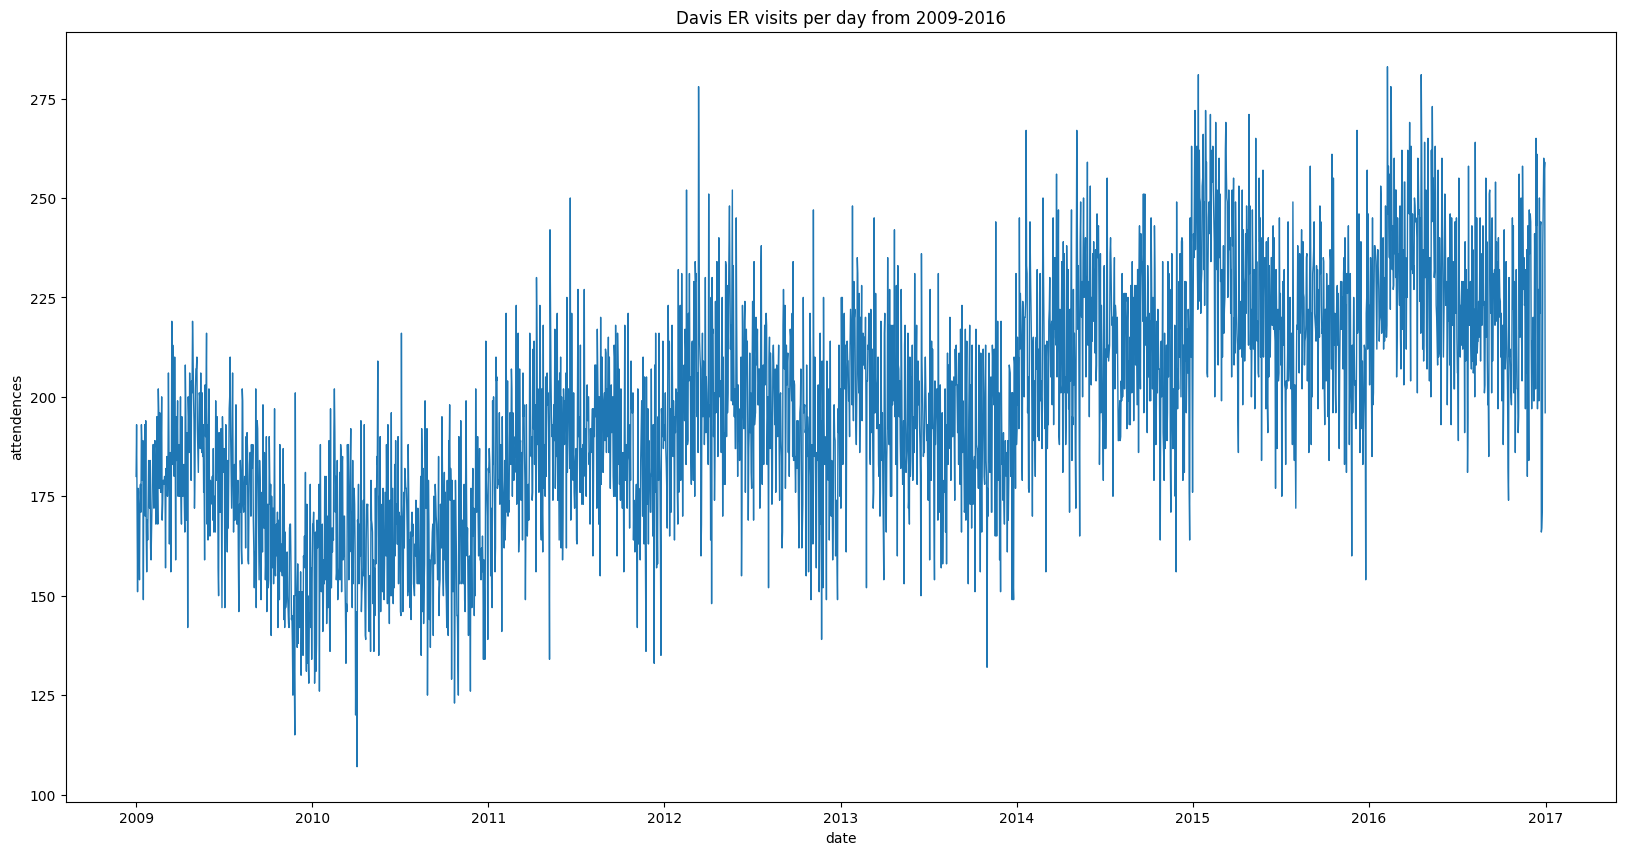

In [35]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='date', y='attendences', linewidth=1)
plt.title('Davis ER visits per day from 2009-2016')

Text(0.5, 1.0, 'Daily Davis ER visits by year from 2009-2016')

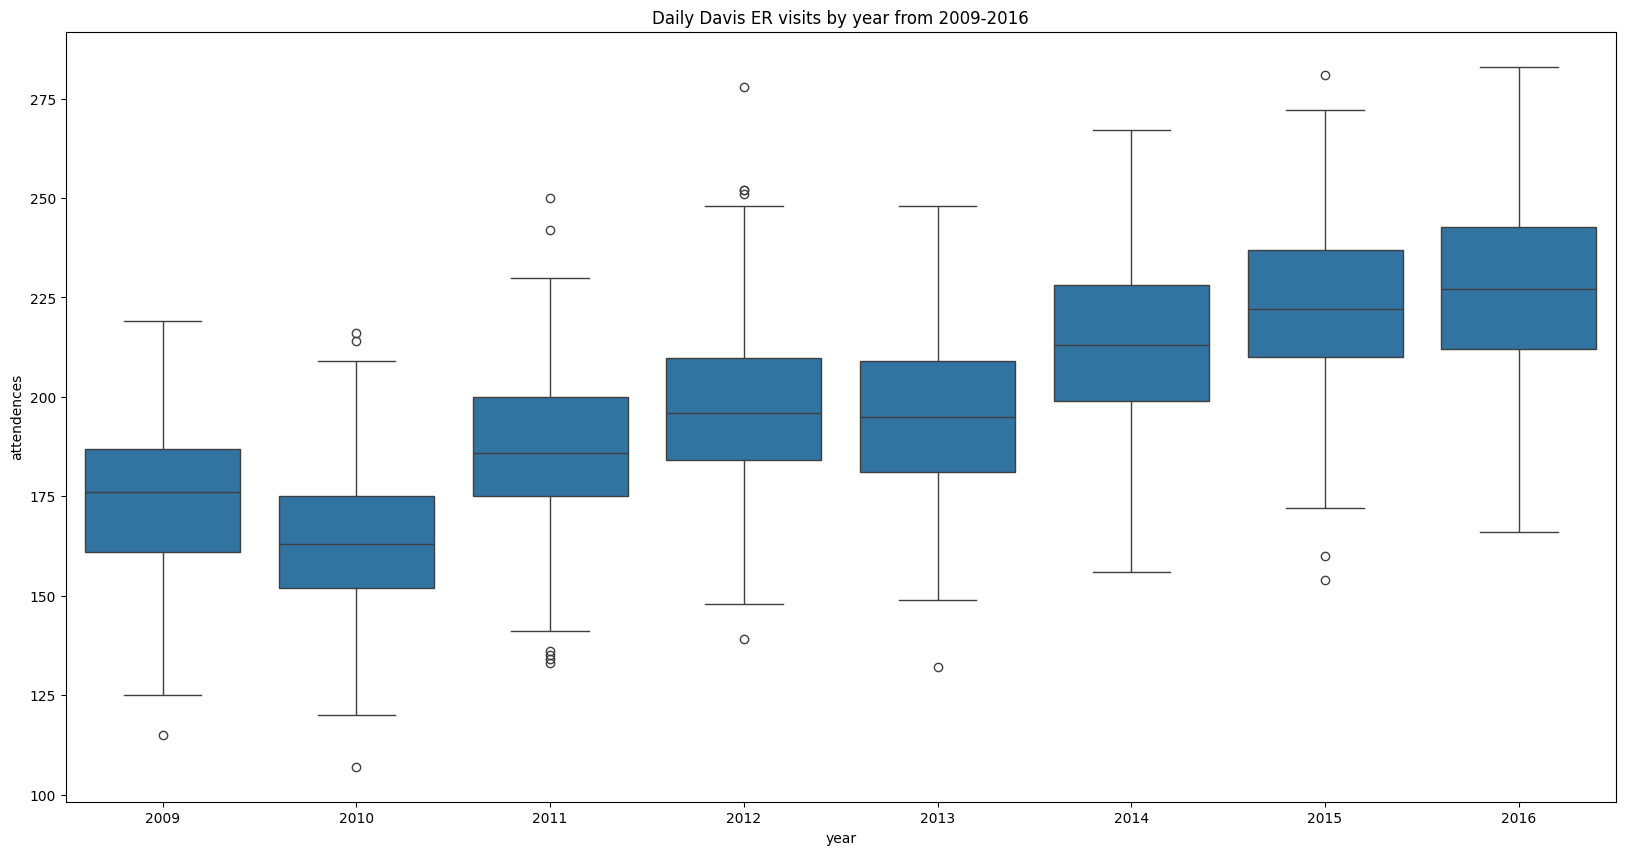

In [37]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='year', y='attendences')
plt.title('Daily Davis ER visits by year from 2009-2016')

The number of visits per day has trended upwards over time. We will have to keep this in mind when developing our model.

Text(0.5, 1.0, 'Davis ER average daily temperature from 2009-2016')

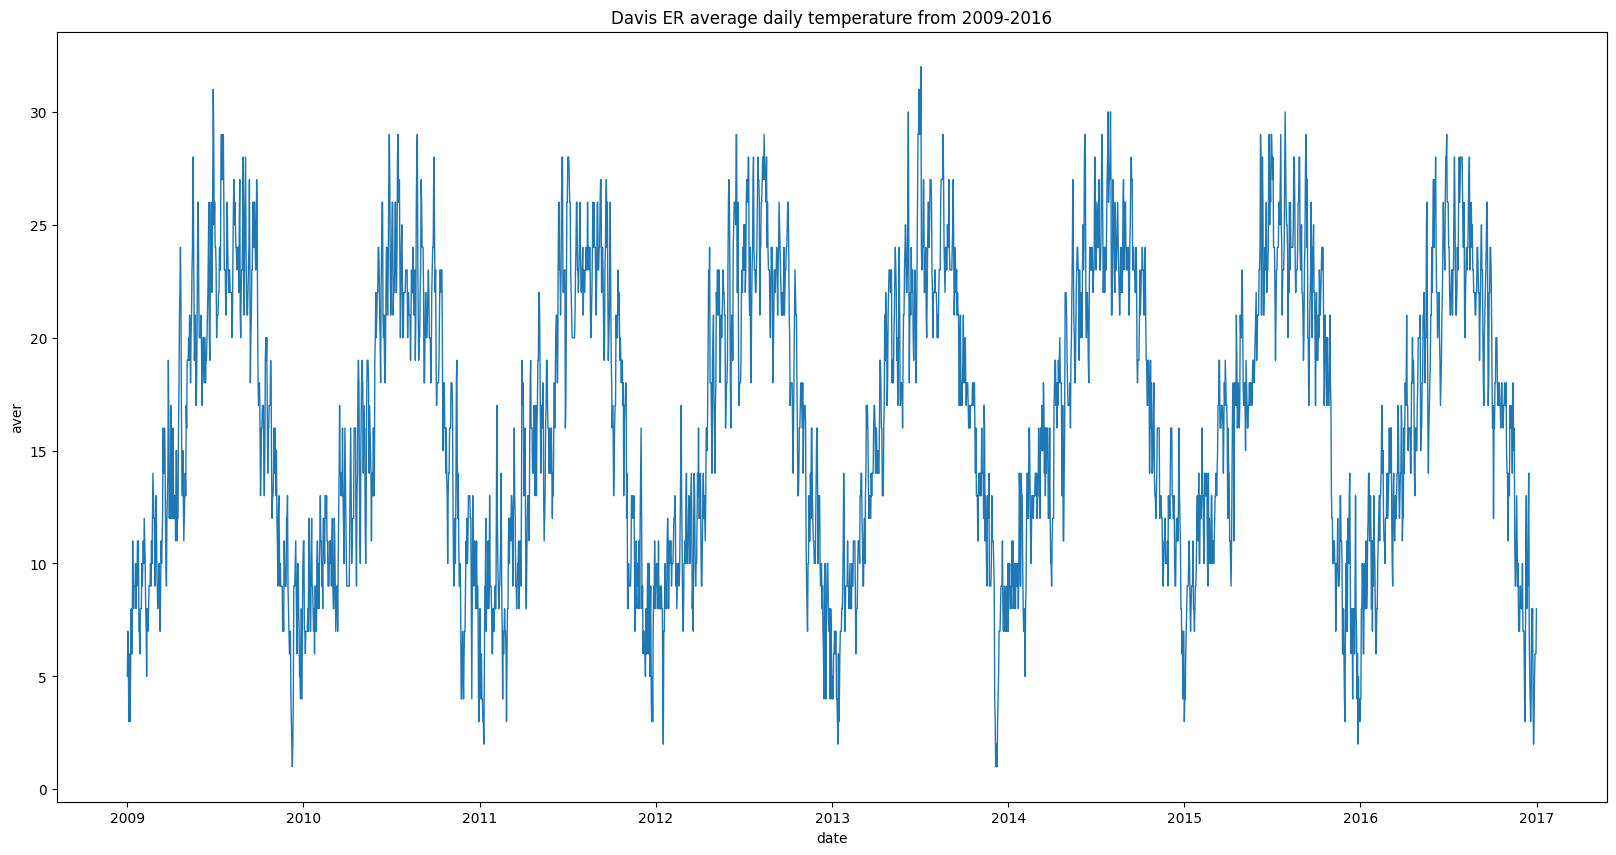

In [38]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='date', y='aver', linewidth=1)
plt.title('Davis ER average daily temperature from 2009-2016')

Text(0.5, 1.0, 'Daily Davis ER visits by month from 2009-2016')

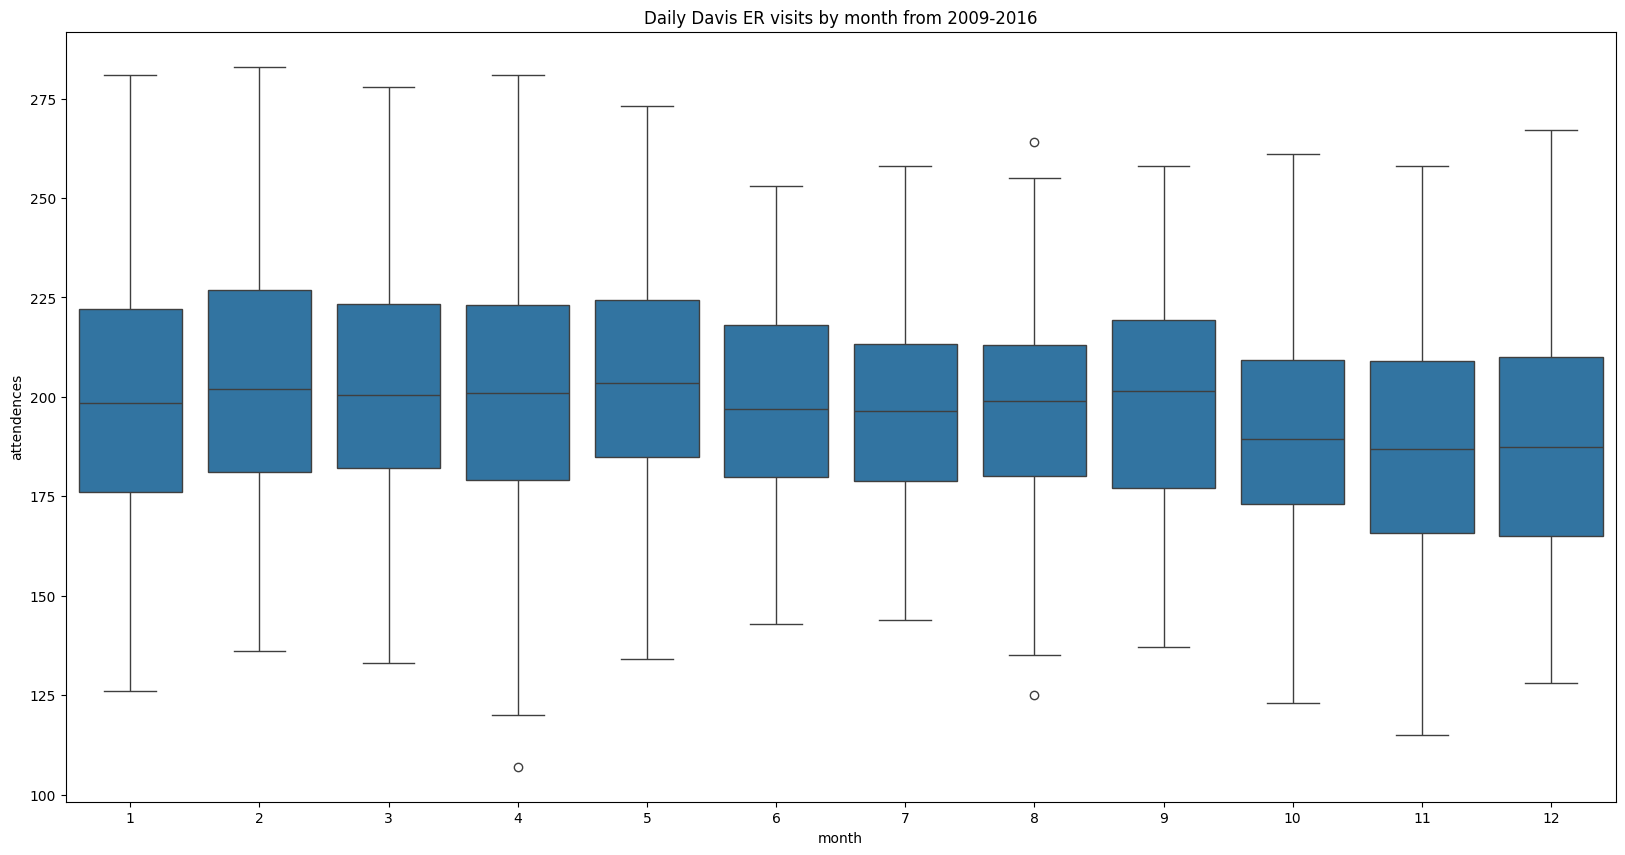

In [39]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='month', y='attendences')
plt.title('Daily Davis ER visits by month from 2009-2016')

Text(0.5, 1.0, 'Daily Davis ER visits by day of week from 2009-2016 (0=Sunday)')

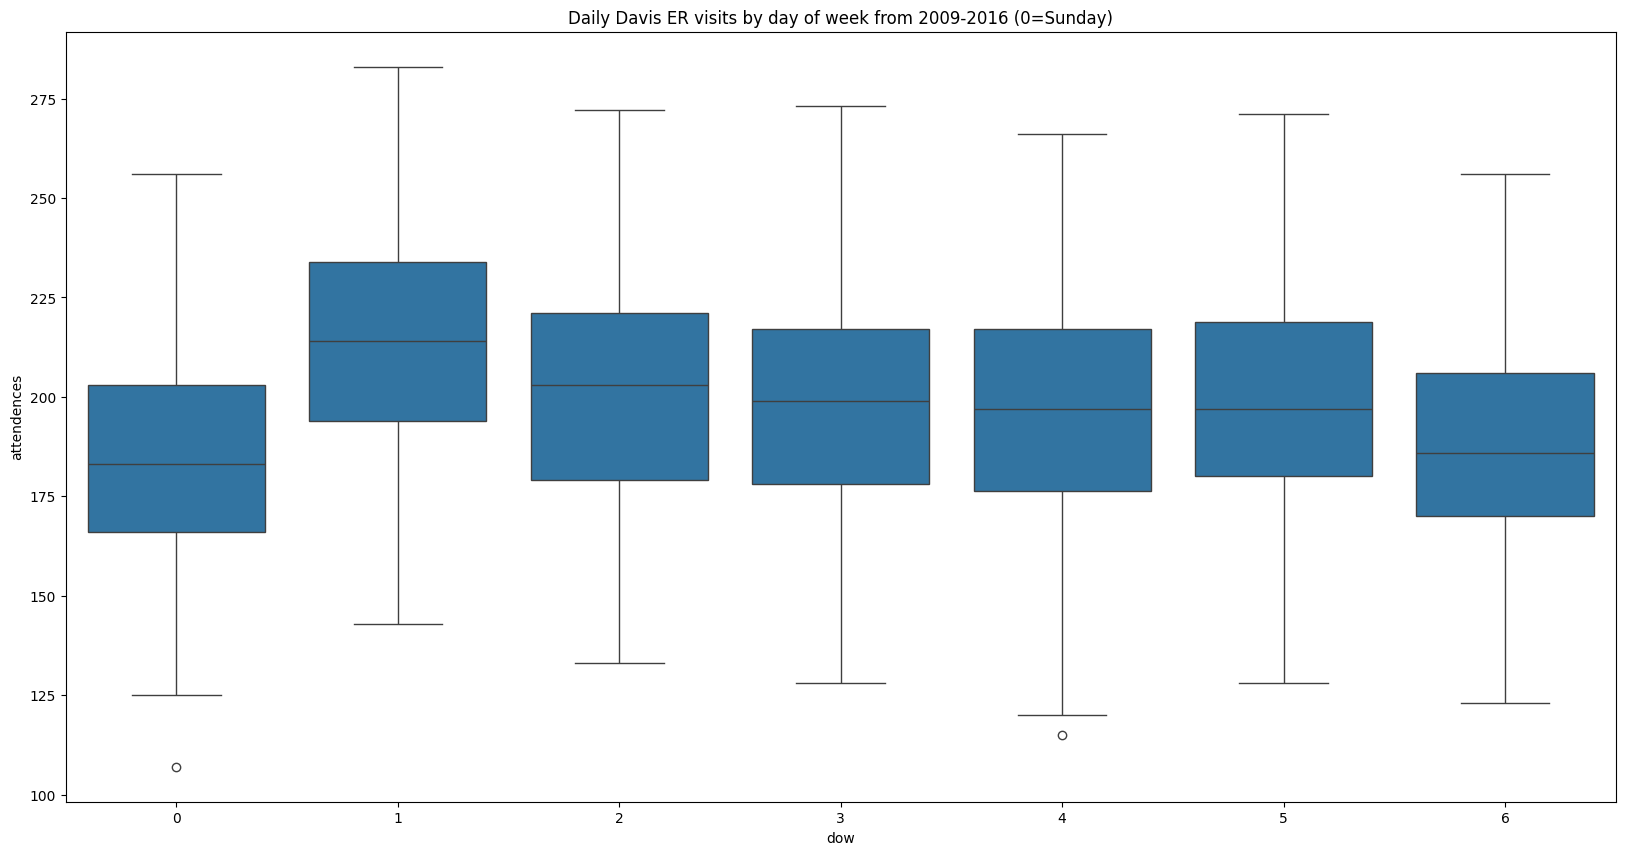

In [41]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='dow', y='attendences')
plt.title('Daily Davis ER visits by day of week from 2009-2016 (0=Sunday)')

Variation of patient visits to the ED on different days of the week